## **1. Data Preparation**

## **Problem Statement**

Analisis data adalah proses menganalisis data mentah untuk menarik informasi dan membuat kesimpulan tentang data tersebut. Analisis data adalah bidang penting dalam ilmu data karena membantu bisnis mengoptimalkan kinerjanya. Analisis data membantu bisnis mengurangi biaya dan meningkatkan efisiensi bisnis secara keseluruhan.

Ketika bank menerima aplikasi pinjaman, bank harus membuat keputusan apakah akan melanjutkan persetujuan pinjaman atau tidak. Bank membuat keputusan pinjaman berdasarkan profil pemohon. Dua jenis risiko terkait dengan keputusan bank.

Jika pemohon adalah risiko kredit yang baik, yaitu kemungkinan untuk membayar kembali pinjaman, maka tidak menyetujui pinjaman kepada orang tersebut mengakibatkan hilangnya bisnis ke bank, Jika pemohon adalah risiko kredit yang buruk, yaitu tidak mungkin untuk membayar kembali pinjaman, maka menyetujui pinjaman kepada orang tersebut mengakibatkan kerugian finansial bagi bank.

## **Objective**

Tujuan dari Analisis Data Kredit Jerman adalah untuk meminimalkan kemungkinan mengeluarkan pinjaman berisiko kepada pemohon sambil memaksimalkan peluang untuk mendapatkan keuntungan dari pinjaman yang baik. Profil demografis dan sosial-ekonomi pemohon dipertimbangkan oleh manajer pinjaman sebelum keputusan diambil mengenai permohonan pinjamannya dengan cara memberikan gambaran tentang profil nasabah yang melakukan pinjaman uang di bank serta memberikan saran kepada manager terkait profil nasabah yang menguntungkan.

## **Define Columns**
| **Nama Kolom** |**Keterangan Kolom** |
| --- | --- |
|Age| Umur Customer|
|Sex| Gender Customer|
|Job| Pekerjaan Customer|
|Housing| Jenis tempat tinggal|
|Saving accounts| Tingkatan Rekening Tabungan|
|Cheking accounts| Tingkatan Rekening Check|
|Credit amount| Total Pinjaman|
|Duration| Durasi Pinjaman|
|Purpose| Tujuan Pinjaman|

## **Data Wrangling**

In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import warnings 
warnings.simplefilter("ignore")

In [57]:
df = pd.read_csv('german_credit_data.csv')
pd.options.display.max_columns=100
pd.options.display.max_rows=1500000
df.head(1)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV


In [58]:
df.shape

(1000, 10)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [60]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [61]:
round((((df['Saving accounts'].isna().sum())/len(df)) * 100),2)

18.3

In [62]:
round((((df['Checking account'].isna().sum())/len(df)) * 100),2)

39.4

In [63]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [64]:
df['Saving accounts'].fillna('little',inplace=True)

In [65]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [66]:
df['Checking account'].fillna('little',inplace=True)

In [67]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [68]:
df.drop(columns='Unnamed: 0',inplace=True)

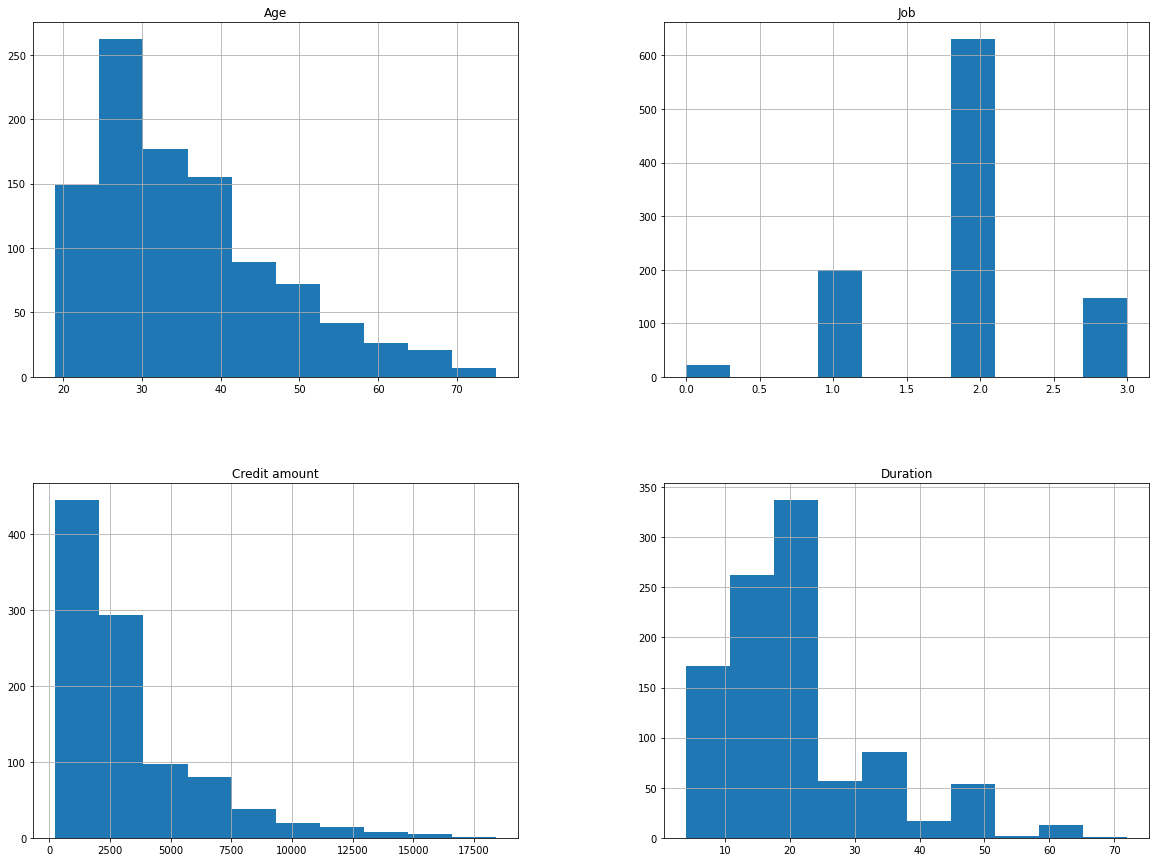

In [69]:
df.hist(figsize = (20,15));

Pada visualisasi pertama ini membuat visualisasi grafik pada data numerik yaitu kolom age, job, credit amount dan duration. Dan didapatkan :

- Pada grafik age/umur terjadi pelonjakan kenaikan dari umur 20 ke 25 dan dari 25 sampai 40 merupakan umur yang dengan jumlah terbanyak dan semakin tua umurnya semakin menurun grafik.
- Pada grafik job label 2 mendominasi dengan jumlah >600.
- Pada grafik Credit amount paling banyak yaitu pada jumlah credit amount 0-3000 dan untuk semakin besar credit amount semakin sedikit jumlahnya juga.
- Pada grafik duration didapatkan durasi yang paling banyak diambil oleh nasabah yaitu dengan durasi 2-25 bulan, untuk yang lebih dari itu juga ada tetapi terdapat perbedaan grafik yang cukup berbeda signifikan lebih sedikit.

In [70]:
df.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8
top,NaN,male,NaN,own,little,little,NaN,NaN,car
freq,NaN,690,NaN,713,786,668,NaN,NaN,337
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN


- Pada tabel deskripsi dataset dibawah didapatkan nilai-nilai statistikal dari tiap kolom yaitu :
  #
  - Count (Jumlah data) yaitu 1000 tiap-tiap kolomnya
  - Mean (Nilai rataan) yaitu pada kolom Age=35.5, Job=1.9, Credit amount=3271.26, Duration=20.9
  - Standar Deviasi yaitu pada kolom Age=11.38, Job=0.65, Credit amount=2822.74, Duration=12.06
  - min (Nilai terendah) yaitu pada kolom Age=19, Job=0, Credit amount=250, Duration=4
  - 25% atau Kuartil-1 pada data yaitu kolom Age=27, Job=2, Credit amount=1365, Duration=12
  - 50% atau Kuartil-2 atau nilai tengah pada data yaitu kolom Age=33, Job=2, Credit amount=2319, Duration=18
  - 75% atau Kuartil-3 pada data yaitu kolom Age=27, Job=2, Credit amount=1365, Duration=18
  - max (Nilai tertinggi) yaitu pada kolom Age=75, Job=3, Credit amount=18424, Duration=72
#
- Deskripsi dataset untuk data yang bertipe data object yaitu :
  #
  - Count (Jumlah data) yaitu 1000 tiap-tiap kolomnya kecuali pada kolom Saving accounts=817 dan kolom Checking account=606
  - Unique (Jumlah data unik pada kolom) yaitu pada kolom Sex=2, Housing=3, Saving accounts=4, Checking account=3, Purpose=8
  - Top (Data yang paling sering muncul) yaitu pada kolom Sex=male, Housing=own, Saving accounts=little, Checking account=little dan Purpose=car
  - Freq (Frekuensi data top muncul) yaitu pada kolom Sex=690, Housing=713, Saving accounts=603, Checking account=274 dan Purpose=337.

<AxesSubplot:>

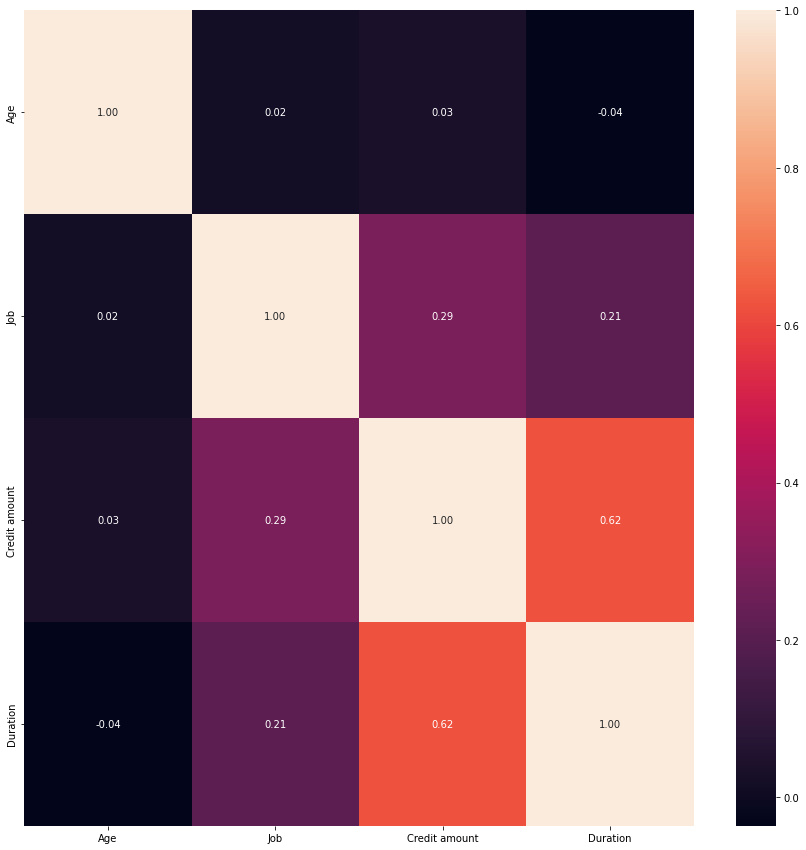

In [71]:
df_heatmaps = df.select_dtypes(['int64','float'])
plt.figure(figsize=(15,15))
sns.heatmap(df_heatmaps.corr(),annot=True, fmt='.2f')

## **3. Data Analyst**

In [72]:
total = float(len(df))

In [73]:
df.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV


#### **SEX**

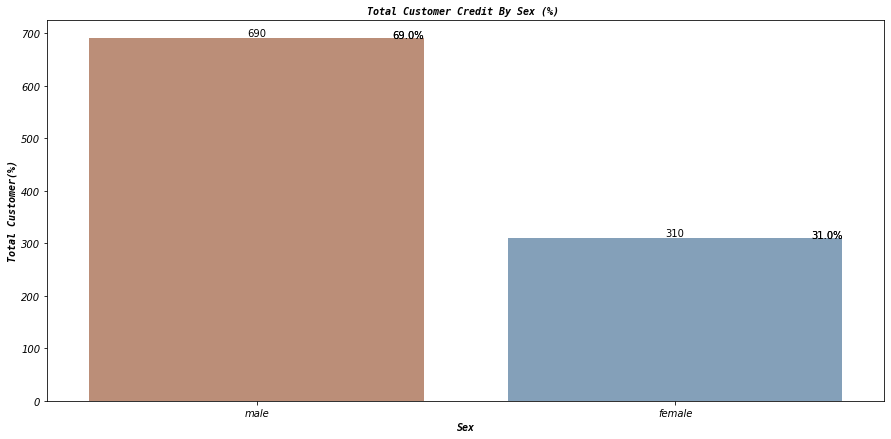

In [74]:
f, axs = plt.subplots(1,1,figsize=(15,7), sharex=True)
ax = sns.countplot(x='Sex', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Customer Credit By Sex',fontstyle='italic',family='monospace', weight=900, size=10)
plt.xlabel('Sex', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Customer', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container, horizontalalignment='right',size=10)
ab = sns.countplot(x="Sex",data=df,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size=10)
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Total Customer Credit By Sex (%) ',fontstyle='italic',family='monospace', weight=900, size=10)
    plt.xlabel('Sex', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Customer(%)', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Nasabah yang mengajukan pinjaman credit banyak berasal dari laki-laki dengan total nasabah 690 orang atau setara dengan 69%

#### **HOUSING**

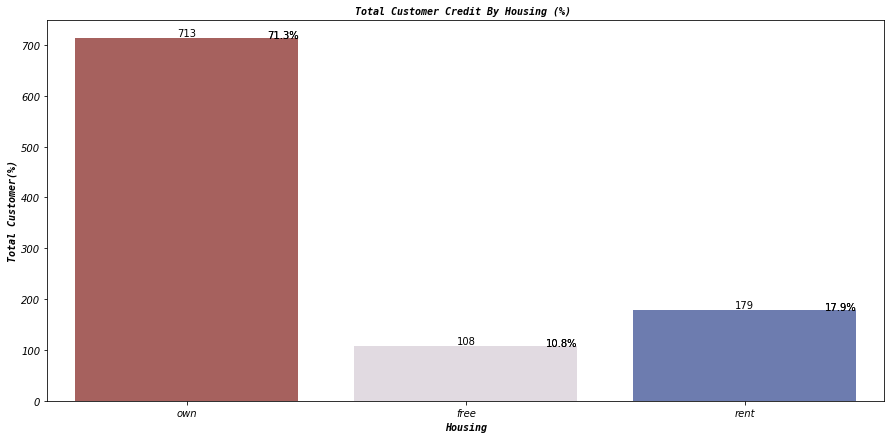

In [75]:
f, axs = plt.subplots(1,1,figsize=(15,7), sharex=True)
ax = sns.countplot(x='Housing', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Customer Credit By Housing',fontstyle='italic',family='monospace', weight=900, size=10)
plt.xlabel('Housing', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Customer', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container, horizontalalignment='right',size=10)
ab = sns.countplot(x="Housing",data=df,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size=10)
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Total Customer Credit By Housing (%) ',fontstyle='italic',family='monospace', weight=900, size=10)
    plt.xlabel('Housing', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Customer(%)', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Nasabah yang mengajukan pinjaman yang paling banyak berasal dari nasabah yang sudah memiliki rumah sendiri sebanyak 713 orang atau setara dengan 71%.

#### **Job**

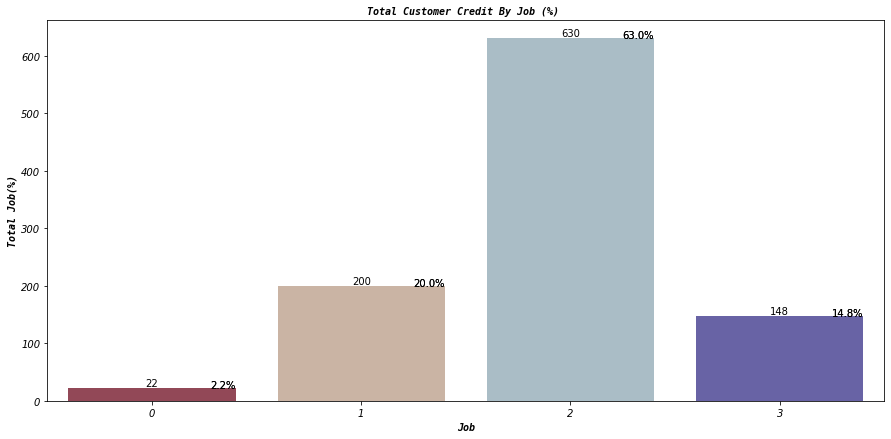

In [76]:
f, axs = plt.subplots(1,1,figsize=(15,7), sharex=True)
ax = sns.countplot(x='Job', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Customer Credit By Job',fontstyle='italic',family='monospace', weight=900, size=10)
plt.xlabel('Job', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Job', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container, horizontalalignment='right',size=10)
ab = sns.countplot(x="Job",data=df,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size=10)
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Total Customer Credit By Job (%) ',fontstyle='italic',family='monospace', weight=900, size=10)
    plt.xlabel('Job', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Job(%)', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Nasabah yang paling banyak mengajukan pinjaman kredit dari pelanggan yang sudah bekerja sebanyak 630 atau setara dengan 63%.

#### **Saving accounts**

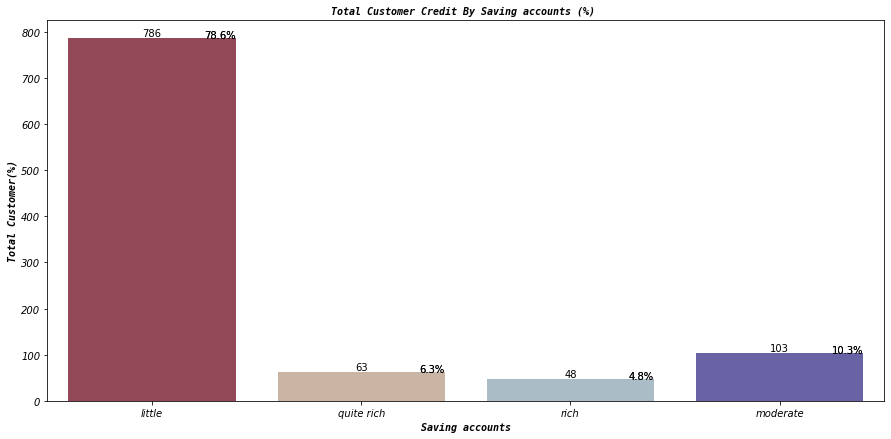

In [77]:
f, axs = plt.subplots(1,1,figsize=(15,7), sharex=True)
ax = sns.countplot(x='Saving accounts', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Customer Credit By Saving accounts',fontstyle='italic',family='monospace', weight=900, size=10)
plt.xlabel('Saving accounts', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Customer', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container, horizontalalignment='right',size=10)
ab = sns.countplot(x="Saving accounts",data=df,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size=10)
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Total Customer Credit By Saving accounts (%) ',fontstyle='italic',family='monospace', weight=900, size=10)
    plt.xlabel('Saving accounts', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Customer(%)', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Nasabah yang mengajukan pinjaman paling banyak berasal dari nasabah dengan jumlah tabungan sedikit.

#### **Checking account**

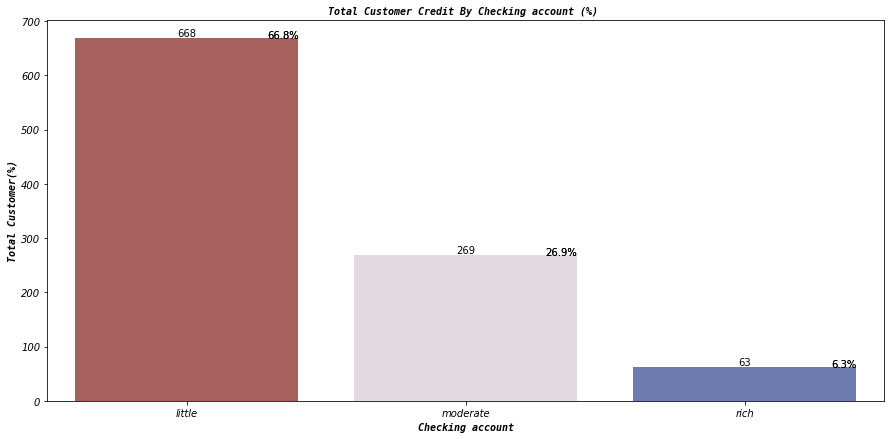

In [78]:
f, axs = plt.subplots(1,1,figsize=(15,7), sharex=True)
ax = sns.countplot(x='Checking account', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Customer Credit By Checking account',fontstyle='italic',family='monospace', weight=900, size=10)
plt.xlabel('Checking account', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Customer', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container, horizontalalignment='right',size=10)
ab = sns.countplot(x="Checking account",data=df,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size=10)
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Total Customer Credit By Checking account (%) ',fontstyle='italic',family='monospace', weight=900, size=10)
    plt.xlabel('Checking account', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Customer(%)', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Nasabah kredit bank didominasi dengan nasabah yang tidak diketahui statusnya.

#### **Credit Amount**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


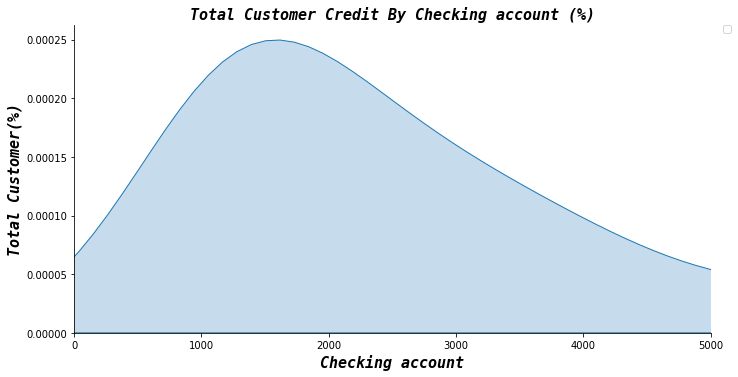

In [79]:
g=(sns.FacetGrid(df[df['Credit amount'] >0.0], height=5, aspect=2).map(sns.kdeplot, 'Credit amount', shade=True))
plt.title('Total Customer Credit By Checking account (%)',fontstyle='italic',size=15,family='monospace', weight=900)
plt.xlabel('Checking account', fontstyle='italic', size=15, family='monospace',weight=900)
plt.ylabel('Total Customer(%)', size=15, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlim(0,5000)
plt.show()

- Insigh :
  - Nasabah paling banyak mengajukan pinjaman pada 18.000 USD

#### **Duration**

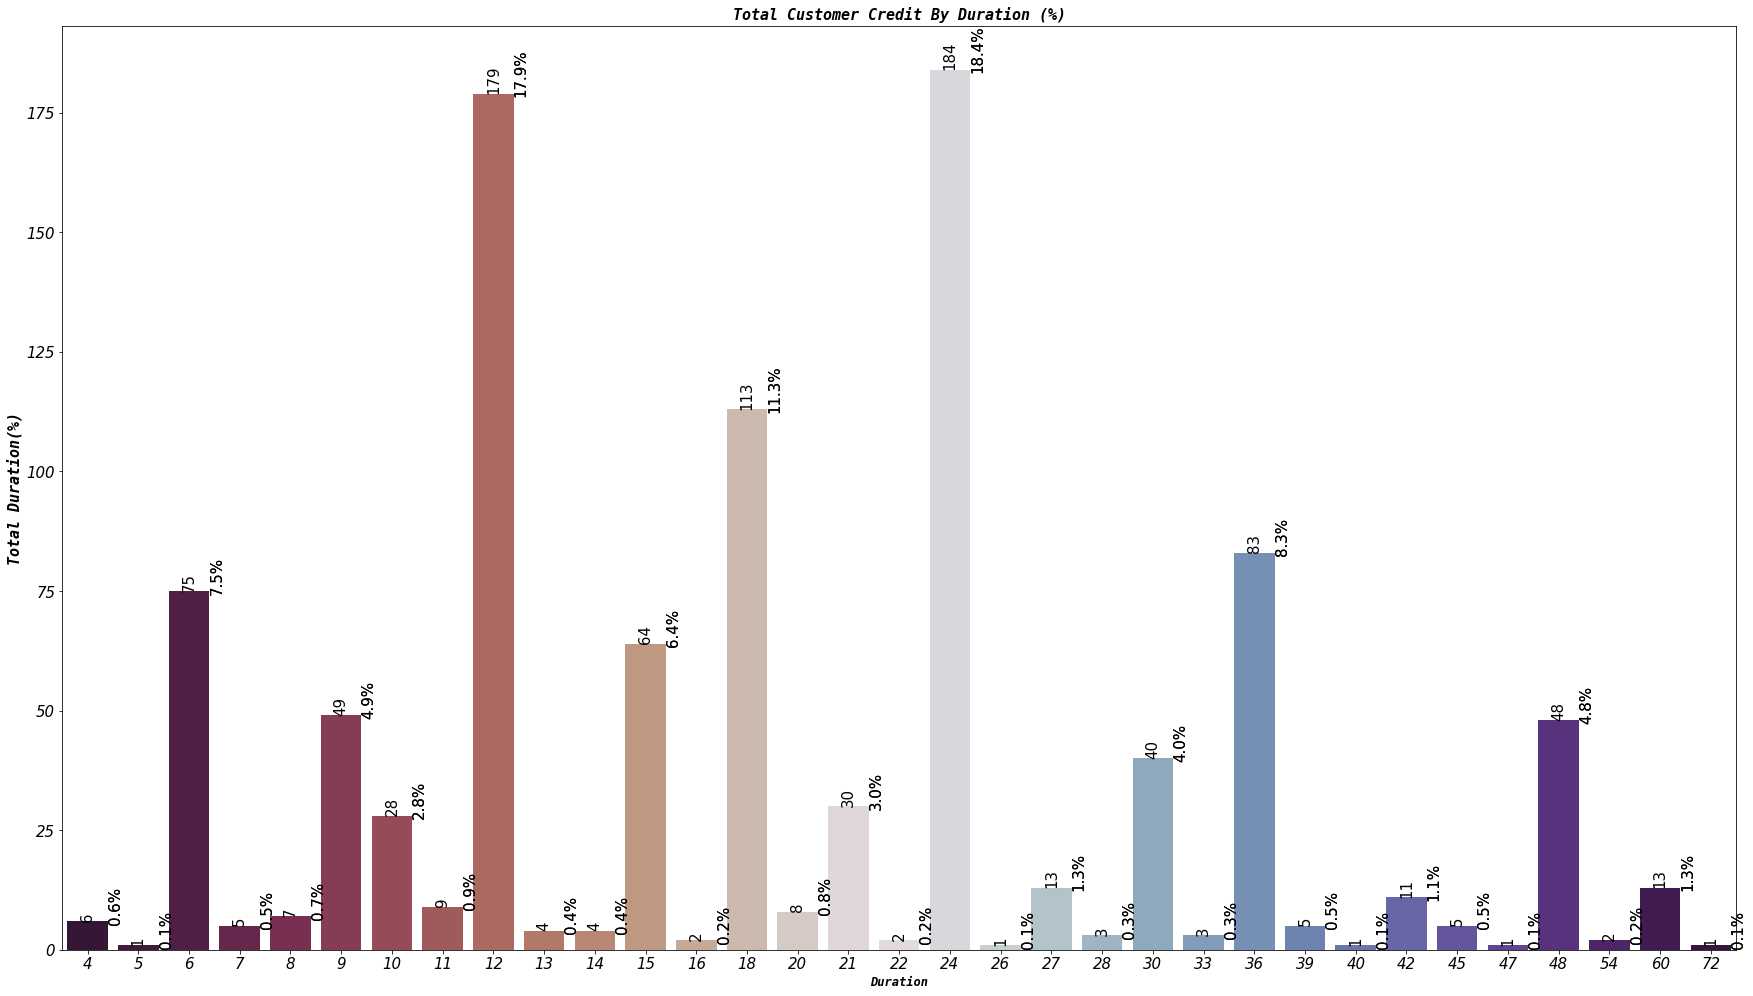

In [80]:
f, axs = plt.subplots(1,1,figsize=(30,17), sharex=True)
ax = sns.countplot(x='Duration', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=15,fontstyle='italic')
plt.yticks(size=15,fontstyle='italic')
plt.title('Total Customer Credit By Duration',size=15,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Durationt', fontstyle='italic', size=15, family='monospace',weight=900)
plt.ylabel('Total Duration', size=15, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container, horizontalalignment='right', size=15, rotation=90)
ab = sns.countplot(x="Duration",data=df,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='left', size=15, rotation=90)
    plt.xticks(size=15,fontstyle='italic')
    plt.yticks(size=15,fontstyle='italic')
    plt.title('Total Customer Credit By Duration (%)',size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Duration', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Duration(%)', size=15, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Pinjaman paling banyak diajukan pinjamana ada pada 24 bulan dengan total nasabah 184 nasabah dengan total persentase 18,4%.

#### **Purpose**

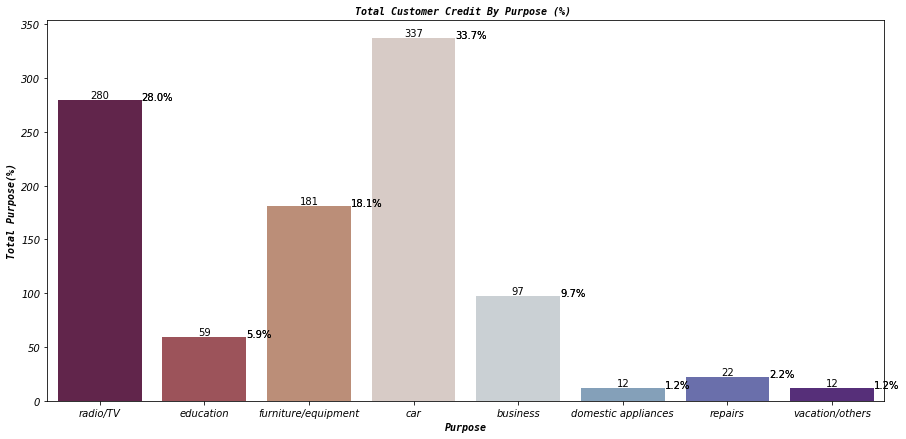

In [81]:
f, axs = plt.subplots(1,1,figsize=(15,7), sharex=True)
ax = sns.countplot(x='Purpose', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Customer Credit By Purpose',fontstyle='italic',family='monospace', weight=900, size=10)
plt.xlabel('Purpose', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Purpose', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container, horizontalalignment='right',size=10)
ab = sns.countplot(x="Purpose",data=df,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='left', size=10)
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Total Customer Credit By Purpose (%) ',fontstyle='italic',family='monospace', weight=900, size=10)
    plt.xlabel('Purpose', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Purpose(%)', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Tujuan pinjaman nasabah yang dilakukan nasabah 3 tertinggi ada untuk pembelian mobil sebanyak 337 nasabah dengan total persentase 33,7%, pembelian radio/tv sebanyak 280 nasabah dengan total 28% persen dan furniture sebanyak 181 nasabah dengan total persentase 18,1%.

## **4. Clustering**

#### **Feature Engineering**

In [82]:
df_new = df.copy()

In [83]:
df_new.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV


In [84]:
def agerange (x):
    if x >18 and x < 26:
        return 1
    elif x >25 and x <36:
        return 2
    elif x > 35 and x < 50:
        return 3
    else:
        return 4

In [85]:
df_new['Age'] = df_new['Age'].apply(agerange)

In [86]:
df_new.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,4,male,2,own,little,little,1169,6,radio/TV


In [87]:
labeler = LabelEncoder()
df_new['Sex'] = labeler.fit_transform(df_new['Sex'])
df_new['Housing'] = labeler.fit_transform(df_new['Housing'])
df_new['Saving accounts'] = labeler.fit_transform(df_new['Saving accounts'])
df_new['Checking account'] = labeler.fit_transform(df_new['Checking account'])
df_new['Purpose'] = labeler.fit_transform(df_new['Purpose'])
df_new.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,4,1,2,1,0,0,1169,6,5
1,1,0,2,1,0,1,5951,48,5
2,3,1,1,1,0,0,2096,12,3
3,3,1,2,0,0,0,7882,42,4
4,4,1,2,0,0,0,4870,24,1


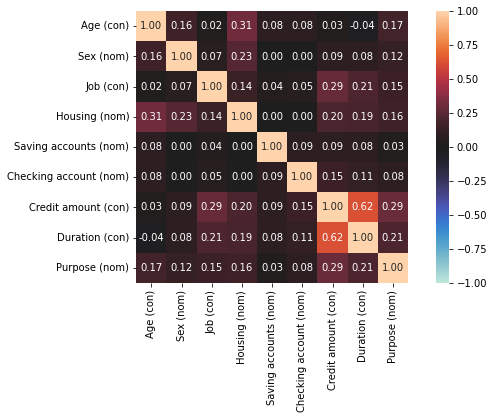

In [88]:
from dython import nominal
nominal.associations(df,figsize=(10,5),mark_columns=True)
plt.show()

In [89]:
df_new.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,4,1,2,1,0,0,1169,6,5


In [90]:
scaler = MinMaxScaler()
Age = df_new['Age']
Sex = df_new['Sex']
Job = df_new['Job']
Savingaccounts = df_new['Saving accounts']
Checkingaccount = df_new['Checking account']
Duration = df_new['Duration']
Purpose = df_new['Purpose']
df_new.drop(columns=['Age','Sex','Job','Saving accounts','Checking account','Duration','Purpose'])
df_new = pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns)
df_new['Age'] = Age
df_new['Sex'] = Sex
df_new['Job'] = Job
df_new['Saving accounts'] = Savingaccounts
df_new['Saving accounts'] = Checkingaccount
df_new['Duration'] = Duration
df_new['Purpose'] = Purpose

In [91]:
df_new.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,4,1,2,0.5,0,0.0,0.050567,6,5
1,1,0,2,0.5,1,0.5,0.313690,48,5
2,3,1,1,0.5,0,0.0,0.101574,12,3
3,3,1,2,0.0,0,0.0,0.419941,42,4
4,4,1,2,0.0,0,0.0,0.254209,24,1


#### **Menentukan Jumlah Clustering**

Text(0, 0.5, 'Inertia')

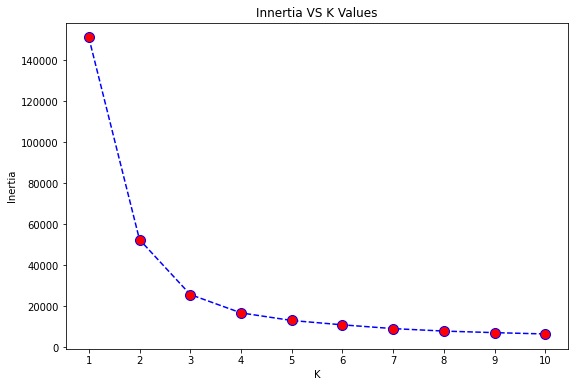

In [92]:
inertia_list = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_new)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1,11),inertia_list, color = 'blue',
         linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Innertia VS K Values')
plt.xticks(range(1,11,1))
plt.xlabel('K')
plt.ylabel('Inertia')

In [93]:
km = KMeans(n_clusters=3).fit(df_new)

In [94]:
df['Category'] = km.labels_

In [95]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Category
0,67,male,2,own,little,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,little,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2


#### **Pembagian Kelompok**

In [96]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Category
0,67,male,2,own,little,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,little,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2


In [97]:
df.groupby('Category').describe(include='all')

Age                                                                \
          count unique top freq       mean        std   min   25%   50%   75%   
Category                                                                        
0         433.0    NaN NaN  NaN  36.300231  12.203992  19.0  27.0  34.0  44.0   
1         173.0    NaN NaN  NaN  35.040462  10.141074  21.0  27.0  33.0  41.0   
2         394.0    NaN NaN  NaN  34.939086  10.913322  20.0  27.0  32.0  40.0   

                 Sex                                                       \
           max count unique   top freq mean  std  min  25%  50%  75%  max   
Category                                                                    
0         75.0   433      2  male  287  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1         65.0   173      2  male  134  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2         75.0   394      2  male  269  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

            Job                                                               \
          count unique top freq      mean       std  min  25%  50%  75%  max   
Category                                                                       
0         433.0    NaN NaN  NaN  1.757506  0.655352  0.0  1.0  2.0  2.0  3.0   
1         173.0    NaN NaN  NaN  2.132948  0.609719  0.0  2.0  2.0  2.0  3.0   
2         394.0    NaN NaN  NaN  1.964467  0.633064  0.0  2.0  2.0  2.0  3.0   

         Housing                                                      \
           count unique  top freq mean  std  min  25%  50%  75%  max   
Category                                                               
0            433      3  own  314  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1            173      3  own  112  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2            394      3  own  287  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

         Saving accounts                                                    \
                   count unique     top freq mean  std  min  25%  50%  75%   
Category                                                                     
0                    433      4  little  336  NaN  NaN  NaN  NaN  NaN  NaN   
1                    173      4  little  142  NaN  NaN  NaN  NaN  NaN  NaN   
2                    394      4  little  308  NaN  NaN  NaN  NaN  NaN  NaN   

              Checking account                                               \
          max            count unique     top freq mean  std  min  25%  50%   
Category                                                                      
0         NaN              433      3  little  289  NaN  NaN  NaN  NaN  NaN   
1         NaN              173      3  little  107  NaN  NaN  NaN  NaN  NaN   
2         NaN              394      3  little  272  NaN  NaN  NaN  NaN  NaN   

                   Credit amount                                            \
          75%  max         count unique top freq         mean          std   
Category                                                                     
0         NaN  NaN         433.0    NaN NaN  NaN  1887.517321  1551.712396   
1         NaN  NaN         173.0    NaN NaN  NaN  6685.427746  3569.970320   
2         NaN  NaN         394.0    NaN NaN  NaN  3292.852792  2188.197196   

                                                  Duration                  \
            min      25%     50%     75%      max    count unique top freq   
Category                                                                     
0         250.0  1053.00  1424.0  2214.0  14896.0    433.0    NaN NaN  NaN   
1         909.0  3844.00  6229.0  8858.0  18424.0    173.0    NaN NaN  NaN   
2         433.0  1820.75  2681.5  4036.5  12976.0    394.0    NaN NaN  NaN   

                                                            Purpose         \
               mean       std   min   25%   50%   75%   max   count unique   
Category                                                                     
0         10.711316  2.981779   

#### **Pengelompokan Per Cluster**

##### **Age**

Disini dilakukan pengelompokan usia menjadi 3 kelompok, yaitu `Remaja`, `Dewasa` dan `Lansia`.

In [98]:
age_labels = ['Remaja', 'Dewasa', 'Lansia']
df['Age label'] = pd.qcut((df['Age']), 3, labels=age_labels)

In [99]:
agecol = ['Age']
groupby_age = df.groupby('Age label')[agecol].mean()
groupby_age['Median'] = df.groupby('Age label')[agecol].median()
groupby_age['Max'] = df.groupby('Age label')[agecol].max()
groupby_age['Min'] = df.groupby('Age label')[agecol].min()
groupby_age

,Age,Median,Max,Min
Age label,,,,
Remaja,24.766467,25.0,28,19
Dewasa,33.251445,33.0,38,29
Lansia,49.278125,47.0,75,39


Dari tabel diatas didapatkan :

- Untuk kelompok remaja rata nya pada umur 25, Nilai tengah 25, Nilai maksimal 28, Nilai Minimal 19.
- Untuk kelompok dewasa rata nya pada umur 33, Nilai tengah 33, Nilai maksimal 38, Nilai Minimal 29.
- Untuk kelompok dewasa rata nya pada umur 49, Nilai tengah 47, Nilai maksimal 75, Nilai Minimal 39.

In [100]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Category,Age label
0,67,male,2,own,little,little,1169,6,radio/TV,0,Lansia
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,Remaja
2,49,male,1,own,little,little,2096,12,education,0,Lansia
3,45,male,2,free,little,little,7882,42,furniture/equipment,1,Lansia
4,53,male,2,free,little,little,4870,24,car,2,Lansia


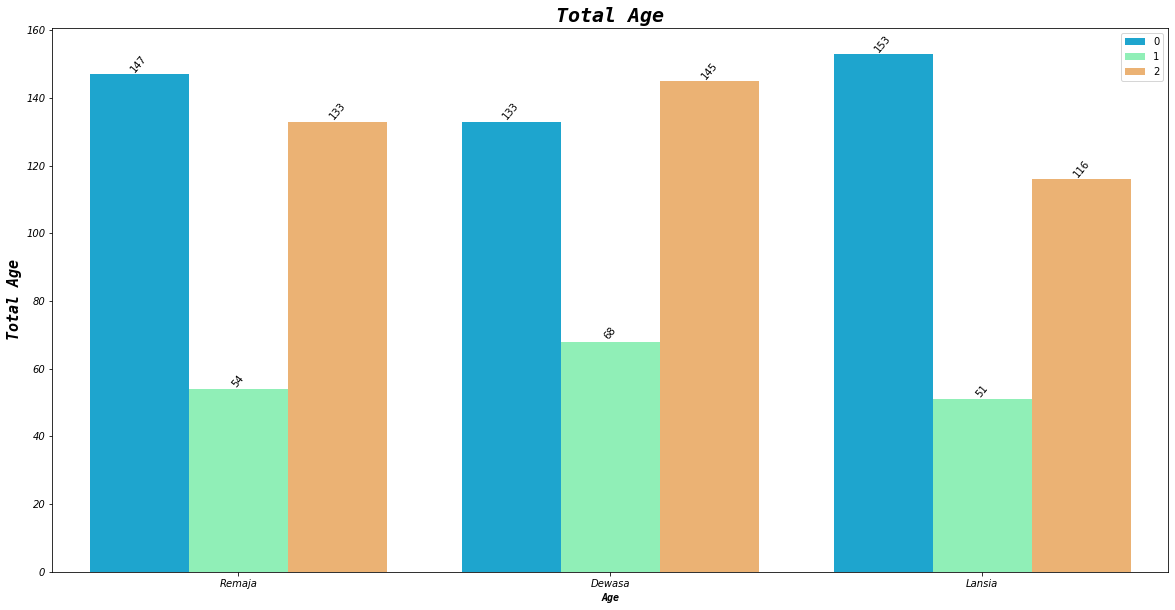

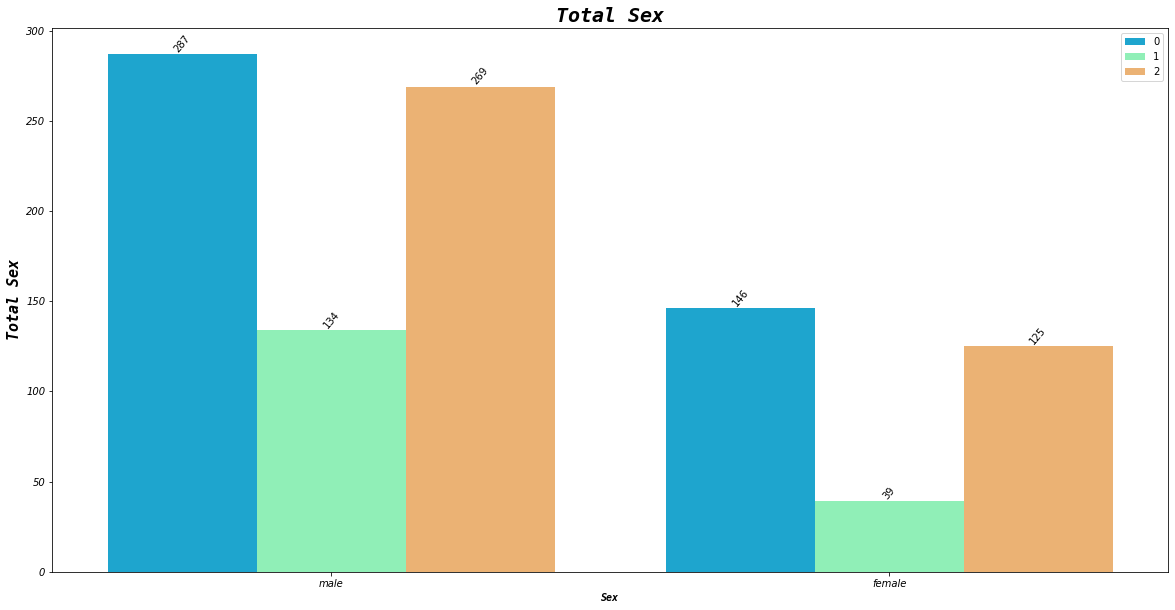

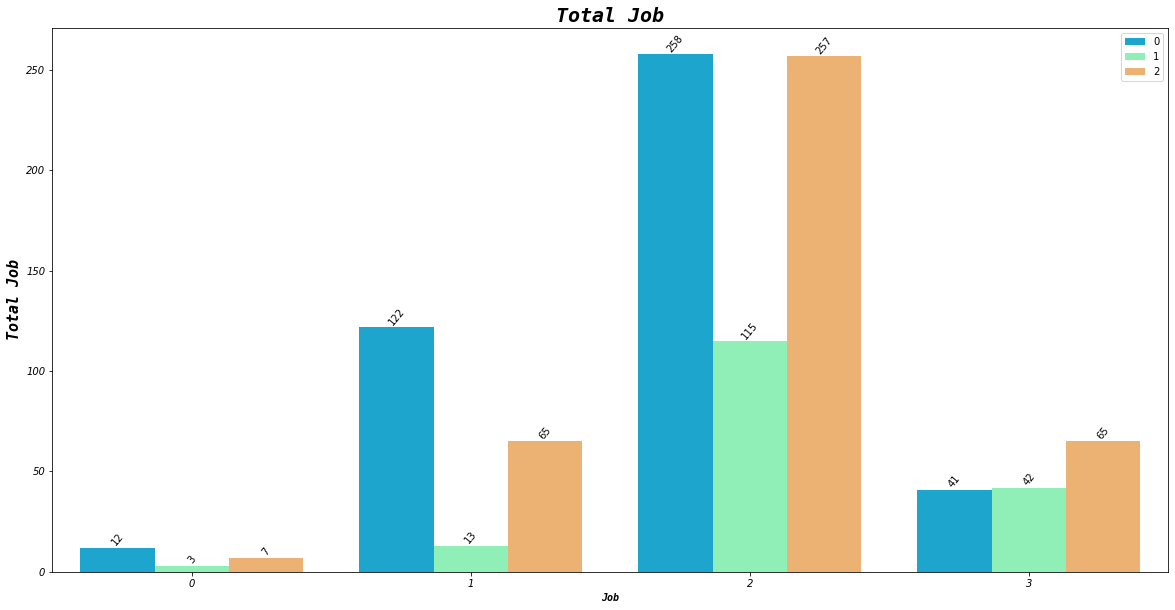

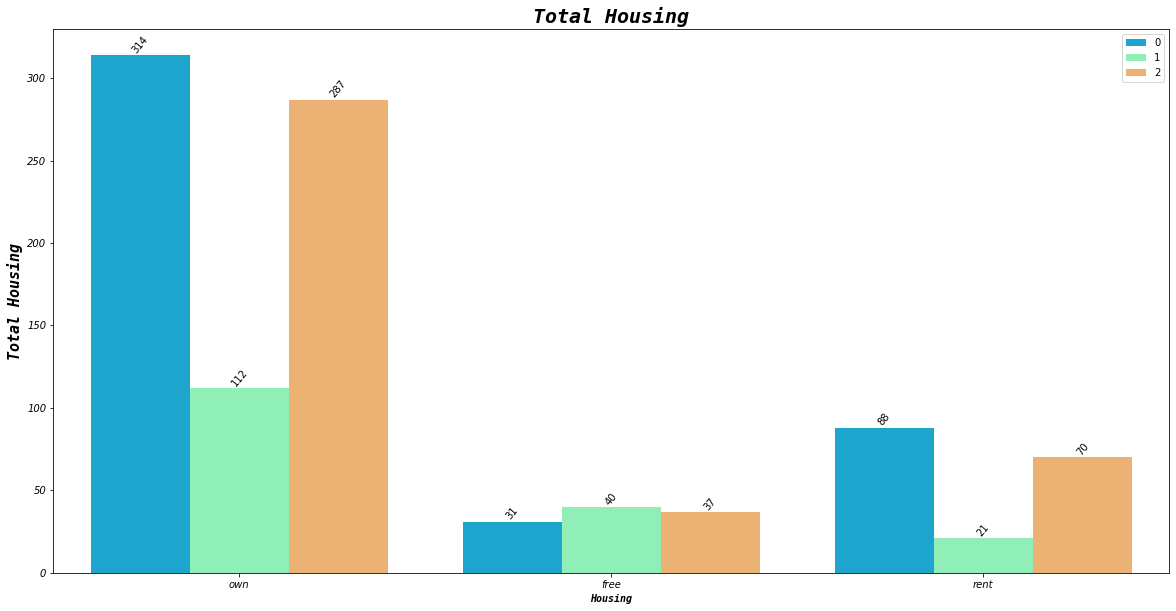

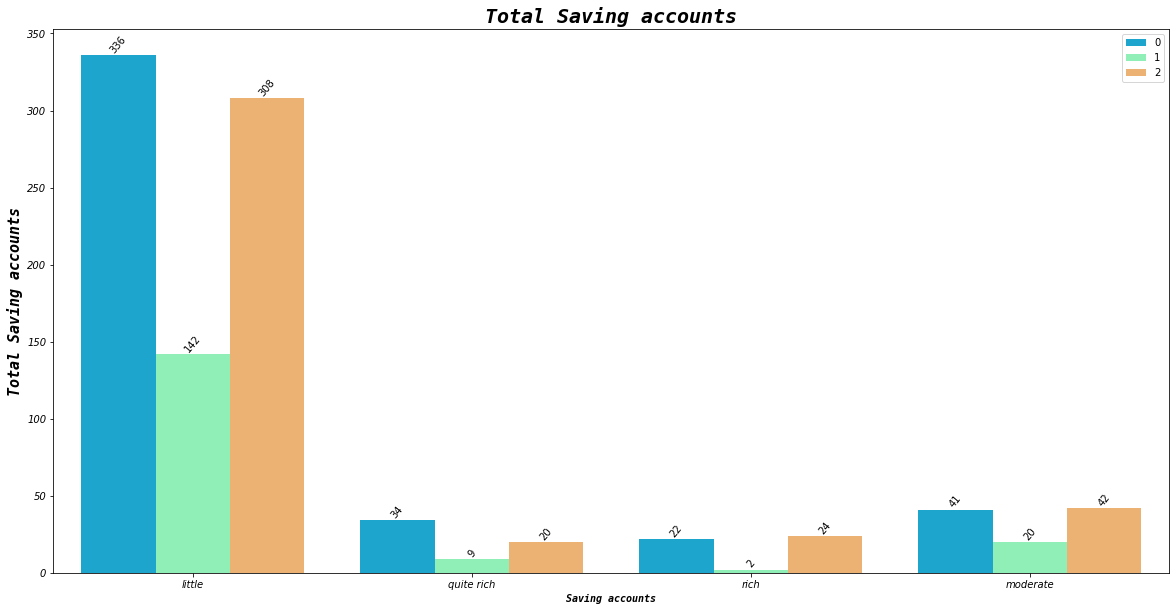

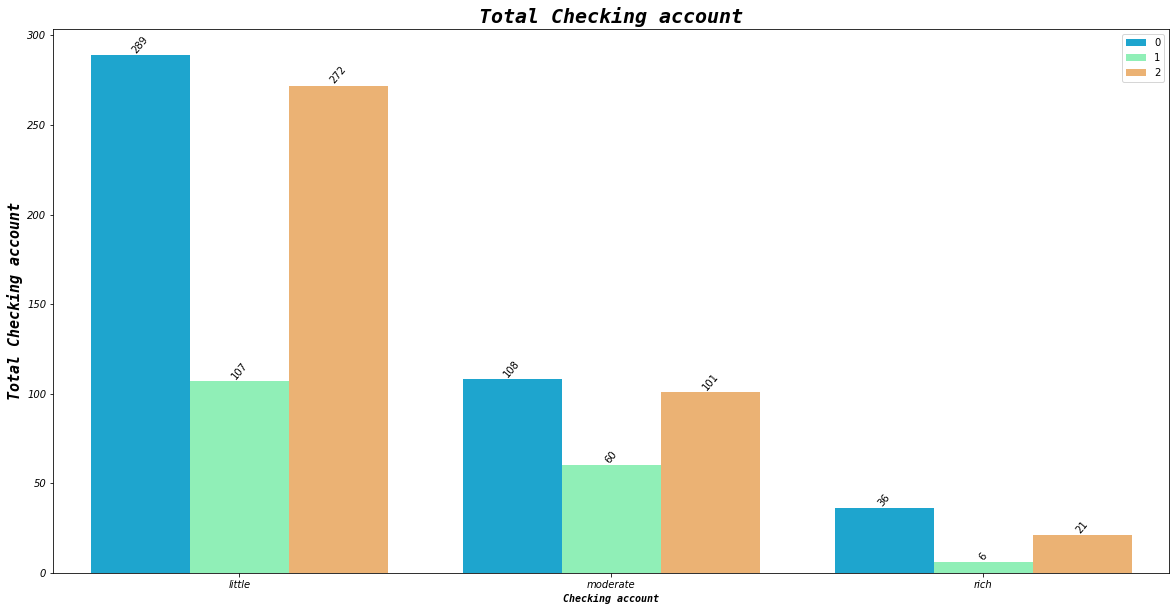

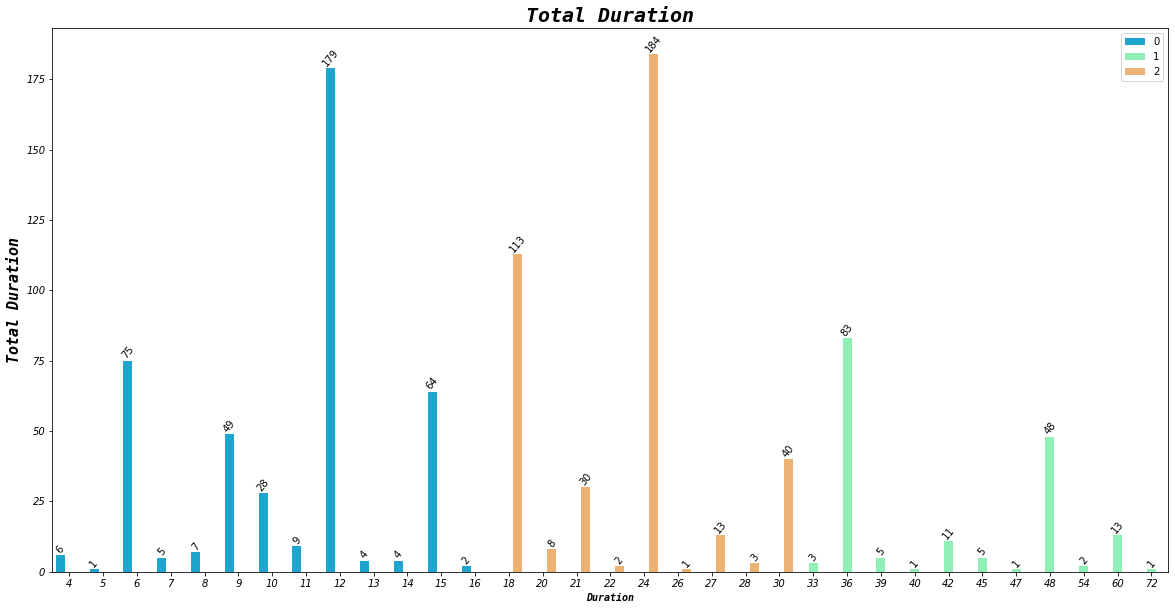

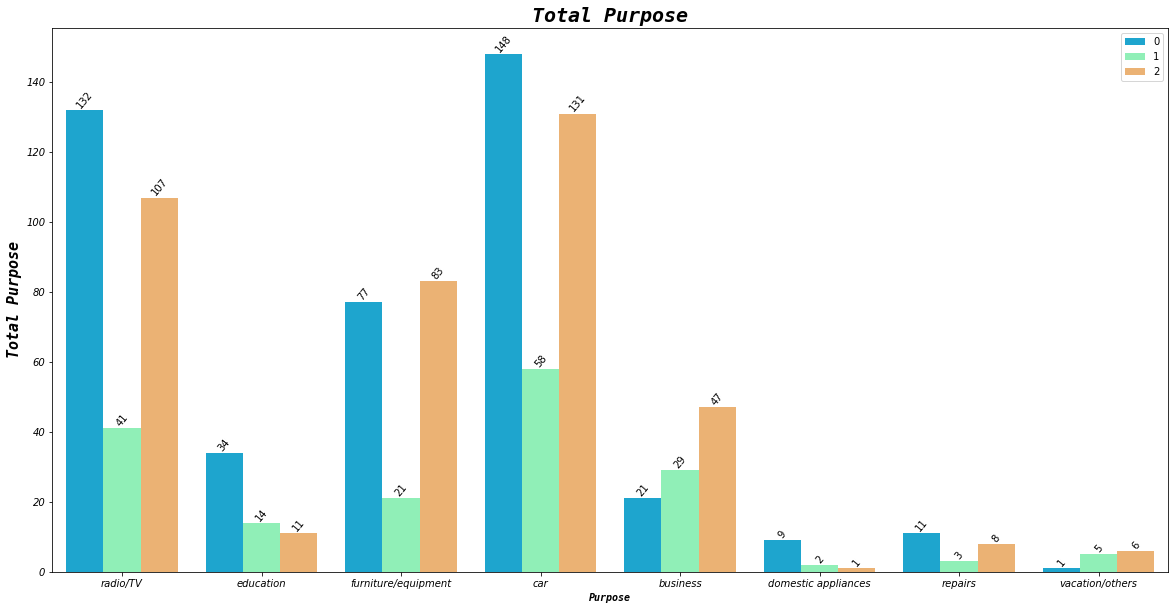

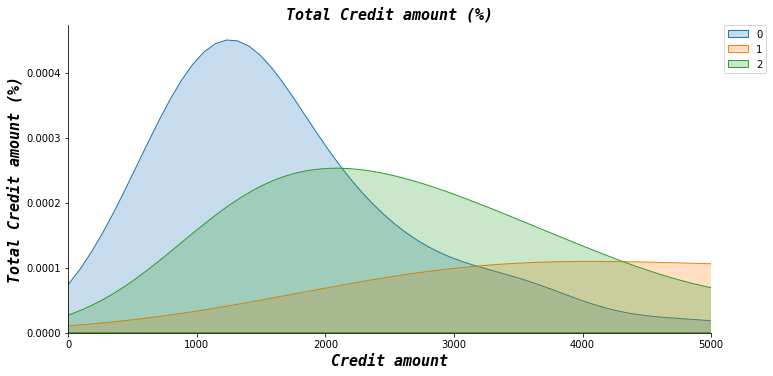

In [112]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Age label', data=df, hue="Category", palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Age',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Age', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Age', size=15, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=50, horizontalalignment='left')
plt.legend(fontsize=10)
plt.show()

plt.figure(figsize=(20,10))
ax = sns.countplot(x='Sex', data=df, hue="Category", palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Sex',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Sex', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Sex', size=15, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=50, horizontalalignment='left')
plt.legend(fontsize=10)
plt.show()

plt.figure(figsize=(20,10))
ax = sns.countplot(x='Job', data=df, hue="Category", palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Job',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Job', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Job', size=15, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=50, horizontalalignment='left')
plt.legend(fontsize=10)
plt.show()

plt.figure(figsize=(20,10))
ax = sns.countplot(x='Housing', data=df, hue="Category", palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Housing',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Housing', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Housing', size=15, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=50, horizontalalignment='left')
plt.legend(fontsize=10)
plt.show()

plt.figure(figsize=(20,10))
ax = sns.countplot(x='Saving accounts', data=df, hue="Category", palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Saving accounts',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Saving accounts', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Saving accounts', size=15, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=50, horizontalalignment='left')
plt.legend(fontsize=10)
plt.show()

plt.figure(figsize=(20,10))
ax = sns.countplot(x='Checking account', data=df, hue="Category", palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Checking account',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Checking account', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Checking account', size=15, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=50, horizontalalignment='left')
plt.legend(fontsize=10)
plt.show()

plt.figure(figsize=(20,10))
ax = sns.countplot(x='Duration', data=df, hue="Category", palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Duration',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Duration', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Duration', size=15, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=50, horizontalalignment='left')
plt.legend(fontsize=10)
plt.show()

plt.figure(figsize=(20,10))
ax = sns.countplot(x='Purpose', data=df, hue="Category", palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Purpose',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Purpose', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Purpose', size=15, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=50, horizontalalignment='left')
plt.legend(fontsize=10)
plt.show()

g=(sns.FacetGrid(df[df['Credit amount'] >0.0],hue="Category", height=5, aspect=2).map(sns.kdeplot, 'Credit amount', shade=True))
plt.title('Total Credit amount (%)',fontstyle='italic',size=15,family='monospace', weight=900)
plt.xlabel('Credit amount', fontstyle='italic', size=15, family='monospace',weight=900)
plt.ylabel('Total Credit amount (%)', size=15, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlim(0,5000)
plt.show()

- Insight :
  - Cluster 0 : Remaja, Male, bekerja tetap, own - rent , little-moderate, 12 bulan, radio/tv - furniture - car, 1000 USD-1200 USD
  - Cluster 1 : Dewasa, Male, bekerja tetap, own - free, little-moderate, 24 bulan, car-radio/tv-business, 2000 USD
  - Cluster 2 : Dewasa, Male, bekerja tetap, own - rent , little-moderate, 36 bulan, car-radio/tv-furniture, >4000 USD


## **Kesimpulan**

- KESIMPULAN :
  - Cluster 0 : Banyak nasabah berumur remaja < 25 tahun dengan jenis kelamin laki laki yang mengajukan pinjaman dan sudah bekerja. Mereka memiliki tempat tinggal pribadi namun sebagian besar nasabah memiliki pinjaman dibank masuk kategori `little / sedikit` dan pengajuan pinjaman untuk nasabah cluster 0 ini paling banyak ada pada 12 bulan dengan tujuan pinjaman pembelian radio/tv, furniture rumah serta mobil dengan total pinjaman tertinggi 1200 USD.
  #
  - Cluster 1 : Banyak nasabah yang berumur dewasa (>25 tahun dan < 35 tahun) dengan jenis kelamin laki laki yang mengajukan pinjaman dan sudah bekerja. Mereka memiliki tempat tinggal pribadi sebagian besarnya dengan total tabungan di bank termasuk kategori `little / sedikit` dan pengajuan pinjaman untuk nasabah cluster 1 ini paling banyak 24 bulan lamanya dengan tujuan paling banyak ada untuk pembelian mobil, radio/tv dan untuk bisnis dengan total pinjaman paling besar mencapai 2000 USD.
  #
  - Cluster 2 : Banyak Nasabah yang berumus dewasa  (>25 tahun dan < 35 tahun) dengan jenis kelamin laki laki yang mengajukan pinjaman dan sudah bekerja. Mereka memiliki tempat tinggal pribadi sebagian besarnya dengan total tabungan di bank termasuk kategori `little / sedikit` dan pengajuan pinjaman untuk nasabah cluster 2 ini paling banyak 36 bulan lamanya dengan tujuan paling banyak ada untuk pembelian mobil, furniture dan untuk radio/tv dengan total pinjaman paling besar mencapai lebih dari 4000 USD.

- SARAN :
  - Saran kepada manager bank, pinjaman dapat diperioritaskan pada nasabah yang masuk dalam clustering 1 dengan kriteria nasabah 25-35 tahun, memiliki pekerjaan tetap dan memiliki simpanan tabungan. Selain itu pinjaman yang diajukan nasabah ini jika dibandingkan dengan nasabah lain paling menguntungkan untuk bank dan tingkat pembayaran yang dilakukan nasabah kecil dari resiko. Hal ini seperti perhitungan berikut
    - Secara hitungan :
      - Nasabah 1 : Pinjaman 2.000 USD / 24 Bulan = 83 Dollar nasabah harus membayar kepada bank, 
      - Nasabah 0 : Pinjaman 1.200 USD / 12 bulan = 100 Dollar nasabah harus membayar kepada bank,
      - Nasabah 2 : Pinjaman 4.000 USD / 36 bulan = 111 Dollar nasabah harus membayar kepada bank.
  - Dari perhitungan di atas dapat dilihat, nasabah yang masuk dalam cluster 1 memiliki total pembayaran pinjaman yang paling kecil kepada perbankan, dengan total simpanan tabungannya yang kecil kemungkinan hal ini tidak memberatkan nasabah dalam melakukam pembayaran bulanannya serta dari perbankan tetap bisa menjalankan bisnis dengan memberikan pinjaman kepada nasabah yang berjumlah berkisar diatas 1200 - 2000 USD dengan total jangka waktu pembayaran 24 bulan.